# Understanding contour plot

A contour line or isoline of a function of two variables is a curve along which the function has a constant value.

A contour line of a function with two variables is a curve which connects points with the same values.

In [12]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import numpy as np

feature_x = np.arange(0, 50, 2)
feature_y = np.arange(0, 50, 3)

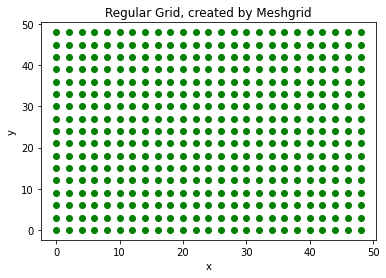

In [14]:
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
ax.scatter(X, Y, color="green")
ax.set_title('Regular Grid, created by Meshgrid')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

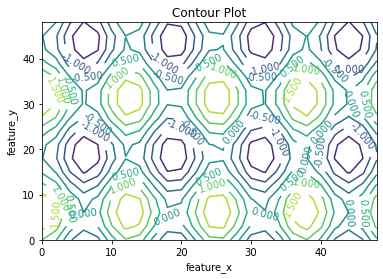

In [16]:
## define a variable Z, which is function of X and Y

Z = np.cos(X / 2) + np.sin(Y / 4)

fig, ax = plt.subplots(1, 1)
# plots contour lines
cplot = ax.contour(X, Y, Z)
ax.clabel(cplot, inline=True, 
          fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

plt.show()

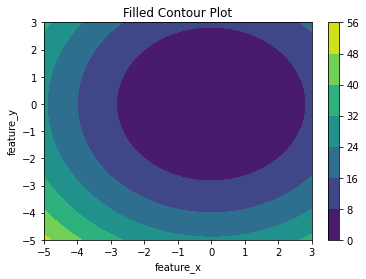

In [19]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import numpy as np

feature_x = np.linspace(-5.0, 3.0, 70)
feature_y = np.linspace(-5.0, 3.0, 70)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z = X ** 2 + Y ** 2

# plots filled contour plot
cplot = ax.contourf(X, Y, Z)
plt.colorbar(cplot)

ax.set_title('Filled Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

plt.show()

# Example 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

create the data sample using sklearn.datasets with 200 samples, 8 features, and 2 classes. Then data is split into the train(80%) and test(20%) data and scaled using StandardScaler.

In [3]:
X,Y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape

(200, 8)

Finding the value of K:

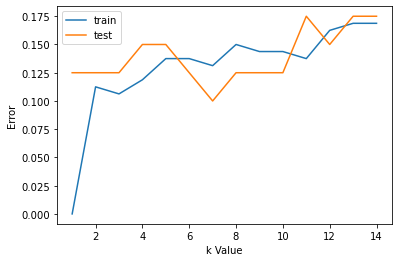

In [6]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
## for each K look for all the cases where y_train is not equal to y_pred1 and then calculate the mean
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

At low K values, there is overfitting of data/high variance. Therefore test error is high and train error is low. At K=1 in train data, the error is always zero, because the nearest neighbor to that point is that point itself. Therefore though training error is low test error is high at lower K values. This is called overfitting. As we increase the value for K, the test error is reduced.

But after a certain K value, bias/ underfitting is introduced and test error goes high. So we can say initially test data error is high (due to variance) then it goes low and stabilizes and with further increase in K value, it again increases(due to bias). The K value when test error stabilizes and is low is considered as optimal value for K. From the above error curve we can choose K=8 for our KNN algorithm implementation.

In [25]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9

# Example 2

In [36]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('/home/mona/Desktop/suv_data.csv')  

In [23]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values 

In [25]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [26]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [27]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', p=2, metric='minkowski', n_jobs=None)

A) weights = {‘uniform’, ‘distance’} or callable, default=’uniform’
weight function used in prediction. Possible values:
(1) ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
(2) ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
(3) [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

B) algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

C) metric: str or callable, default=’minkowski’

D) p: int, default=2. Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.

In [28]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [29]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifierLog= LogisticRegression(random_state=0)  
classifierLog.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [30]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_predLR= classifierLog.predict(x_test)

In [31]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm_LR = confusion_matrix(y_test, y_predLR)  

In [32]:
print(cm)

[[64  4]
 [ 3 29]]


In [33]:
print(cm_LR)

[[65  3]
 [ 8 24]]


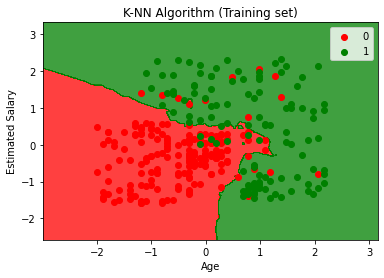

In [37]:
#Visulaizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

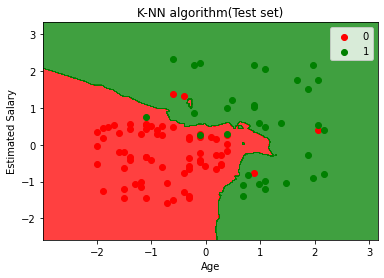

In [38]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('K-NN algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()